## Part 3
### Author: Sruti Keerti Munukutla

In [74]:
import pandas as pd
import numpy as np
training_data_file = pd.read_csv('./data/heart_train_718.csv')
test_data_file = pd.read_csv('./data/heart_test_200.csv')

# data_file.head(5)
df_train = pd.DataFrame(training_data_file)
df_test = pd.DataFrame(test_data_file)

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train['Sex'] = encoder.fit_transform(df_train['Sex'])
df_train['ChestPainType'] = encoder.fit_transform(df_train['ChestPainType'])
df_train['RestingECG'] = encoder.fit_transform(df_train['RestingECG'])
df_train['ExerciseAngina'] = encoder.fit_transform(df_train['ExerciseAngina'])
df_train['ST_Slope'] = encoder.fit_transform(df_train['ST_Slope'])
X_train = df_train.loc[:,'Age':'ST_Slope']
y_train = df_train.HeartDisease

X_train.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,66,0,2,146,278,0,0,152,0,0.0,1
1,65,1,0,150,235,0,1,120,1,1.5,1
2,63,1,0,150,223,0,1,115,0,0.0,1
3,58,1,1,136,164,0,2,99,1,2.0,1
4,54,1,1,192,283,0,0,195,0,0.0,2


In [6]:
len(X_train)

718

In [80]:
encoder = LabelEncoder()
df_test['Sex'] = encoder.fit_transform(df_test['Sex'])
df_test['ChestPainType'] = encoder.fit_transform(df_test['ChestPainType'])
df_test['RestingECG'] = encoder.fit_transform(df_test['RestingECG'])
df_test['ExerciseAngina'] = encoder.fit_transform(df_test['ExerciseAngina'])
df_test['ST_Slope'] = encoder.fit_transform(df_test['ST_Slope'])
X_test = df_test.loc[:,'Age':'ST_Slope']
y_test = df_test.HeartDisease
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,61,1,0,130,0,1,1,77,0,2.5,1
1,40,1,0,152,223,0,1,181,0,0.0,2
2,45,1,0,130,219,0,2,130,1,1.0,1
3,62,1,0,158,170,0,2,138,1,0.0,1
4,60,1,0,130,206,0,0,132,1,2.4,1


In [81]:
len(X_test)

200

## Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#Incresing max_iter helped resolve convergence error
model=LogisticRegression(max_iter=1000)
logisticreg_model = model.fit(X_train, y_train)
y_pred = logisticreg_model.predict(X_test)
print("Training set score: {:.3f}".format(logisticreg_model.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logisticreg_model.score(X_test, y_test)))

Training set score: 0.862
Test set score: 0.850


### Bias, Variance, Mean Squared Error - Logistic Regression

In [137]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(logisticreg_model, X_train.values, y_train.values, X_test.values, y_pred, loss='mse', num_rounds=200, random_seed=123)
print("Mean Squared Error: {:.3f}".format(mse))
print("Bias: {:.3f}".format(bias))
print("Variance: {:.3f}".format(var))


Mean Squared Error: 0.024
Bias: 0.007
Variance: 0.018


### Confusion Matrix - Logistic Regression

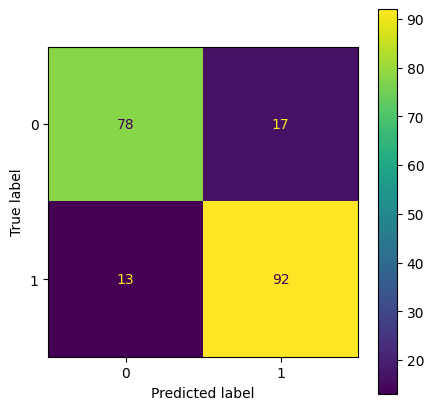

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
plt.show()


### F1 score, Classification Report - Logistic Regression

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        95
           1       0.84      0.88      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



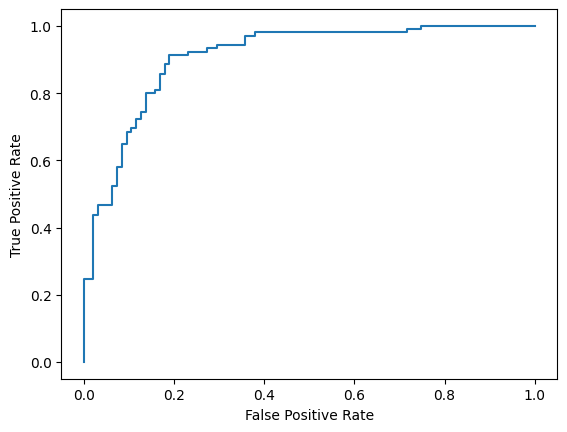

In [88]:
#define metrics
y_pred_probability = logisticreg_model.predict_proba(X_test)[::,1]
falseprob, trueprob, _ = metrics.roc_curve(y_test,  y_pred_probability)

#create ROC curve
plt.plot(falseprob,trueprob)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [89]:
df0 = df_train[df_train['HeartDisease'] == 0]
df1 = df_train[df_train['HeartDisease'] == 1]


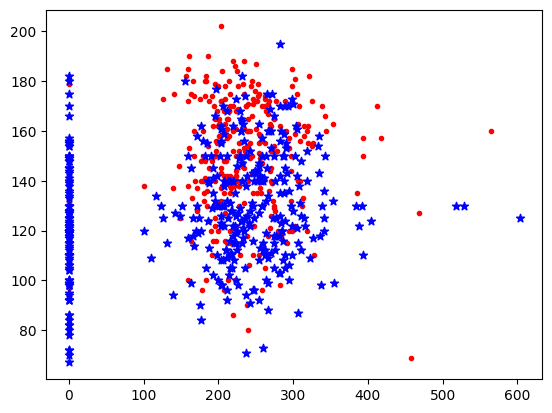

In [90]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(df0['Cholesterol'], df0['MaxHR'], marker='.', color='red')
plt.scatter(df1['Cholesterol'], df1['MaxHR'], marker='*', color='blue')

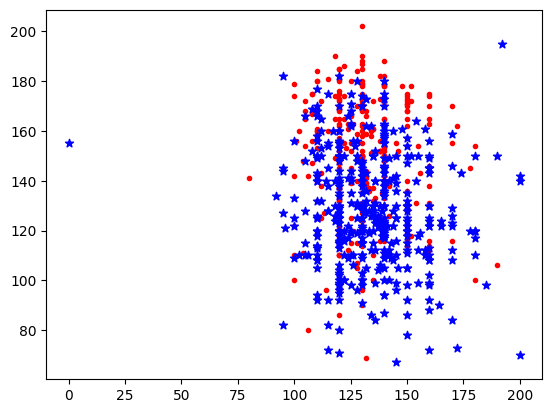

In [91]:
plt.scatter(df0['RestingBP'], df0['MaxHR'], marker='.', color='red')
plt.scatter(df1['RestingBP'], df1['MaxHR'], marker='*', color='blue')

In [161]:
from sklearn.svm import SVC
ml_model = SVC(C=100)
ml_model.fit(X_train, y_train)

SVC(C=100)

In [162]:
ml_model.score(X_test, y_test)

0.825

In [163]:
y_svm = ml_model.predict(X_test)

### Bias, Variance, Mean Squared Error - Support Vector Machine

In [164]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(ml_model, X_train.values, y_train.values, X_test.values, y_svm, loss='mse', num_rounds=200, random_seed=123)
print("Mean Squared Error: {:.3f}".format(mse))
print("Bias: {:.3f}".format(bias))
print("Variance: {:.3f}".format(var))


Mean Squared Error: 0.055
Bias: 0.017
Variance: 0.038


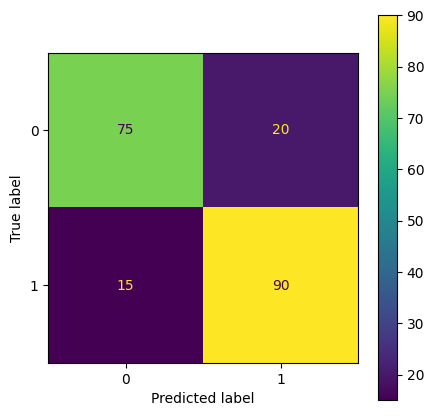

In [165]:
confusion_matrix(y_test, y_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_svm, ax=ax)
plt.show()

### F1 score, Classification Report - SVM

In [166]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        95
           1       0.82      0.86      0.84       105

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



## Decision Tree

In [169]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y = classifier.predict(X_test)

In [170]:
def get_accuracy(y, Y_test):
    total_points = len(y)
    counter = 1
    for i in range(0, len(y)):
        if y[i] == Y_test[i]:
            counter += 1
    return (counter/total_points)*100

print('Accuracy: ' + str(get_accuracy(np.array(y), y_test)) + '%')

Accuracy: 83.5%


### Bias, Variance, Mean Squared Error - Decision Tree

In [171]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(classifier, X_train.values, y_train.values, X_test.values, y, loss='mse', num_rounds=200, random_seed=123)
print("Mean Squared Error: {:.3f}".format(mse))
print("Bias: {:.3f}".format(bias))
print("Variance: {:.3f}".format(var))

Mean Squared Error: 0.187
Bias: 0.082
Variance: 0.105


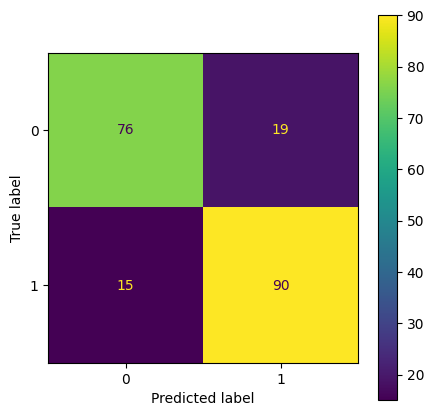

In [172]:
confusion_matrix(y_test, y)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y, ax=ax)
plt.show()


### F1 score, Classification Report - Decision Tree

In [173]:
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.83      0.86      0.84       105

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



[Text(0.5657679738562091, 0.9642857142857143, 'x[10] <= 1.5\ngini = 0.495\nsamples = 718\nvalue = [322, 396]'),
 Text(0.3134531590413943, 0.8928571428571429, 'x[7] <= 151.0\ngini = 0.265\nsamples = 413\nvalue = [65, 348]'),
 Text(0.17592592592592593, 0.8214285714285714, 'x[1] <= 0.5\ngini = 0.191\nsamples = 356\nvalue = [38, 318]'),
 Text(0.08714596949891068, 0.75, 'x[8] <= 0.5\ngini = 0.491\nsamples = 37\nvalue = [16, 21]'),
 Text(0.05228758169934641, 0.6785714285714286, 'x[5] <= 0.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.034858387799564274, 0.6071428571428571, 'x[0] <= 43.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.017429193899782137, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05228758169934641, 0.5357142857142857, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.06971677559912855, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.12200435729847495, 0.6785714285714286, 'x[9] <= 1.1\ngini = 0.245\ns

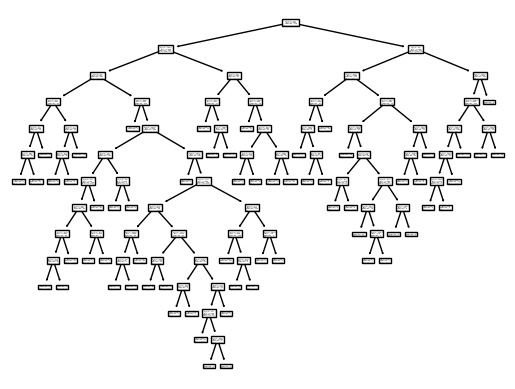

In [175]:
tree.plot_tree(classifier)